# Create a machine learning model for prediction of ice
**Note**: This is NOT how we write and structure code. The focus is a sequencial coding style to match a presentation mode.

**Use case**: Sometimes the road is icy, and I slip and fall. I don't know when this happens, but suspect it is related to the weather (wind, temperature etc).

## Create some ice/not-ice observation data

In [17]:
import pandas as pd
temperatures = [10, -2, 3, 1, -9, 3, 9, 20, -20, 1]
wind_speeds = [1, 9, 2, 4, 10, 3, 2, 1, 20, 0]
ice = [False, True, False, False, True, False, False, False, True, False]

ice_df = pd.DataFrame(data=list(zip(temperatures, wind_speeds, ice)), columns=["Temperature", "WindSpeed", "Ice"])
ice_df

,Temperature,WindSpeed,Ice
0,10,1,False
1,-2,9,True
2,3,2,False
3,1,4,False
4,-9,10,True
5,3,3,False
6,9,2,False
7,20,1,False
8,-20,20,True
9,1,0,False


## Use scikit-learn (de facto standard) to build a model

[Text(167.4, 163.07999999999998, 'WindSpeed <= 6.5\ngini = 0.42\nsamples = 10\nvalue = [7, 3]\nclass = IceFalse'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]\nclass = IceFalse'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = Ice')]

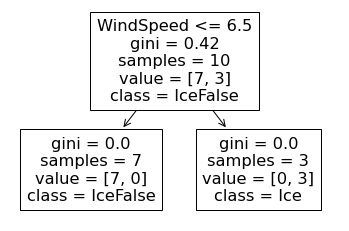

In [18]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
model = DecisionTreeClassifier()

features = ["Temperature", "WindSpeed"]
target = ["Ice"]
model.fit(X=ice_df[features], y=ice_df[target]) # What happens if we run this line/block many times?
plot_tree(model, feature_names = features, class_names = ["IceFalse", "Ice"])


## Using the model in "real life"
So will there be ice today?

In [19]:
temp = 1; wind=10
is_ice = model.predict([[temp, wind]])
print(f"Temperature {temp} and wind speed {10} today, will there be ice? Answer from the computer: {is_ice}")

temp=-1; wind=200
is_ice = model.predict([[temp, wind]])
print(f"Temperature {temp} and wind speed {10} today, will there be ice? Answer from the computer: {is_ice}")


Temperature 1 and wind speed 10 today, will there be ice? Answer from the computer: [ True]
Temperature -1 and wind speed 10 today, will there be ice? Answer from the computer: [ True]


## Next: testing and assessing the quality of the model
We always aim to *test* a model on data that is not used in the *training*. 
The simplest way to do this is to extract a portion of the data, and save it for a "test".

NOTE: This is often not what produces the "final model", but is a way to assess the model. 

### Split data in train and test

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(ice_df[features], ice_df[target], test_size=0.5)
print("Training data:")
print(pd.concat([X_train, y_train], axis=1))
print("Test data:")
print(pd.concat([X_test, y_test], axis=1))

Training data:
   Temperature  WindSpeed    Ice
3            1          4  False
5            3          3  False
9            1          0  False
8          -20         20   True
2            3          2  False
Test data:
   Temperature  WindSpeed    Ice
7           20          1  False
4           -9         10   True
6            9          2  False
1           -2          9   True
0           10          1  False


### Train a model using _only_ the training part

[Text(167.4, 163.07999999999998, 'Temperature <= -9.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]\nclass = IceFalse'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Ice'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = IceFalse')]

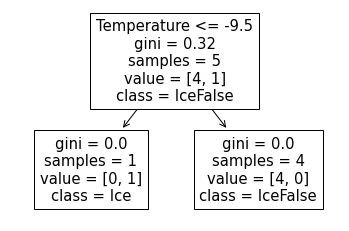

In [21]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
plot_tree(model, feature_names = features, class_names = ["IceFalse", "Ice"])

### Use the model to predict the _test_ data, compare results to truth

In [22]:
y_predicted = model.predict(X_test)

In [23]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_predicted)
print(report)

              precision    recall  f1-score   support

       False       0.60      1.00      0.75         3
        True       0.00      0.00      0.00         2

    accuracy                           0.60         5
   macro avg       0.30      0.50      0.37         5
weighted avg       0.36      0.60      0.45         5



C:\Users\kf10717\Miniconda3\envs\tof-demo\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Further testing strategies
* Split training and test data with "representative" portions of each class (Ice/Not Ice)
* Use cross-validation (repeating the process above with different train/test selections), and average score